In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. svm import SVC
from sklearn.metrics import recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [135]:
x, y = df.drop("target", axis = 1), df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 9)

## Scale Insensitive Models

In [136]:
# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [137]:
# GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [138]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

## Scale Sensitive Models

In [139]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [140]:
# KNeighbors
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [141]:
# Logistic Regression
log = LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [142]:
# SVC
svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

## Scoring Acuracy

In [143]:
rf_clf.score(x_test, y_test)

0.9853658536585366

In [144]:
nb_clf.score(x_test, y_test)

0.8463414634146341

In [145]:
gb_clf.score(x_test, y_test)

0.9707317073170731

In [146]:
knn.score(x_test_scaled, y_test)

0.848780487804878

In [147]:
log.score(x_test_scaled, y_test)

0.8731707317073171

In [148]:
svc.score(x_test_scaled, y_test)

0.9390243902439024

## Recall Scoring

In [149]:
print("Scale Insensitive")
y_preds = rf_clf.predict(x_test)
print('RF:', recall_score(y_test, y_preds))

y_preds = nb_clf.predict(x_test)
print('NB:', recall_score(y_test, y_preds))

y_preds = gb_clf.predict(x_test)
print('GB:', recall_score(y_test, y_preds))

print("\nScale Sensitive")
y_preds = knn.predict(x_test_scaled)
print('KNN:', recall_score(y_test, y_preds))

y_preds = log.predict(x_test_scaled)
print('LOG:', recall_score(y_test, y_preds))

y_preds = svc.predict(x_test_scaled)
print('SVC:', recall_score(y_test, y_preds))

Scale Insensitive
RF: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465

Scale Sensitive
KNN: 0.863849765258216
LOG: 0.92018779342723
SVC: 0.9624413145539906


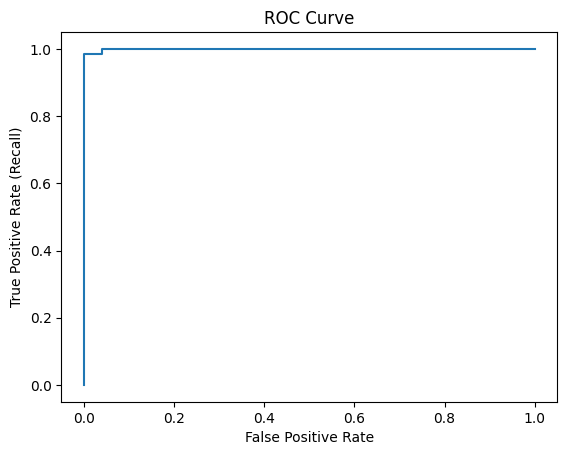

In [150]:
y_probs = rf_clf.predict_proba(x_test)[:,1]

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_probs)

plt.plot(false_pos_rate, true_pos_rate)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

In [151]:
roc_auc_score(y_test, y_probs)

np.float64(0.9994280403231571)

## Hyperparameter Tuning

In [152]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "max_features": ['sqrt', 'log2', None]
}

rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 9)

grid_search = GridSearchCV(rf_clf, param_grid, cv = 3, n_jobs = -1)

In [153]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [154]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

## Feature Importances

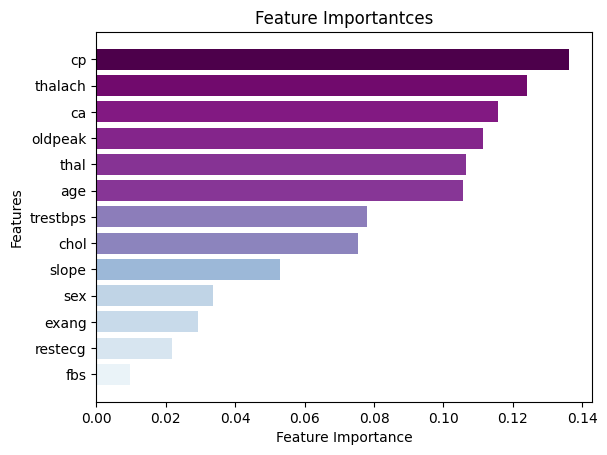

In [160]:
feature_importances = best_rf.feature_importances_
features = best_rf.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.BuPu(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importantces")
plt.show()

<Axes: >

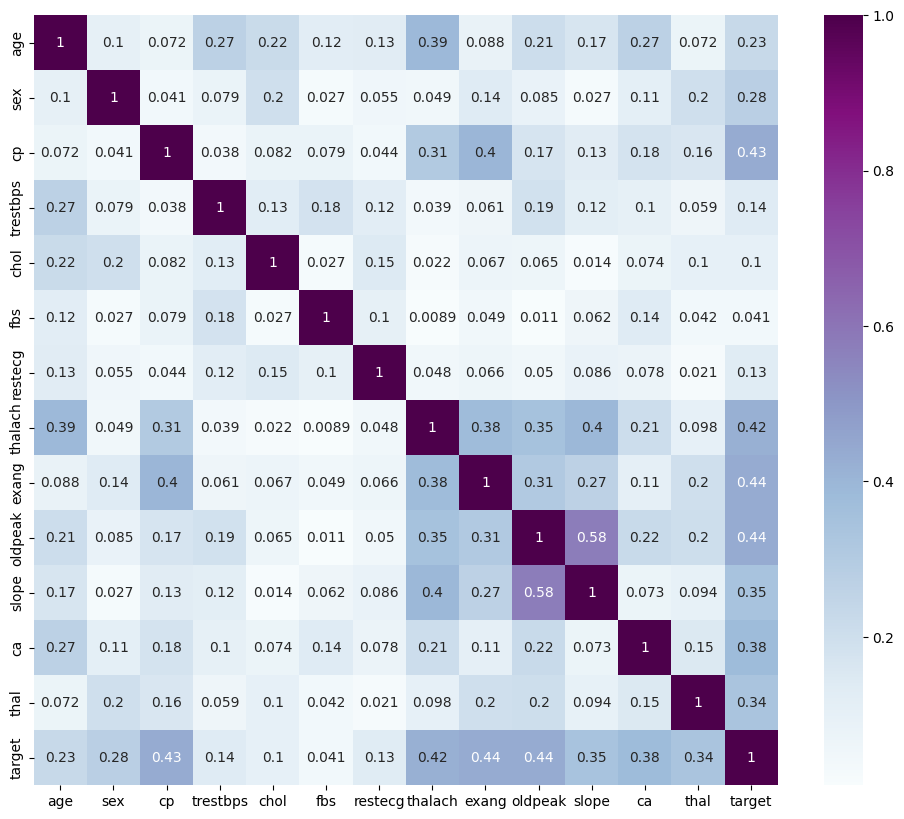

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap="Blues")

## Conclusion

In [186]:
print("Best Random Forest Accuracy Score: ", best_rf.score(x_test, y_test))

Best Random Forest Accuracy Score:  0.9853658536585366


In [188]:
y_preds = best_rf.predict(x_test)
print("Best Random Forest Recall Score: ", recall_score(y_test, y_preds))

Best Random Forest Recall Score:  0.9859154929577465
